A little notebook to help visualise the official results for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

Data automatically loaded from https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load latest cases
rki_reports = pd.read_csv(
    "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv", 
    parse_dates=['Meldedatum']
)

In [4]:
# bring into easy-to-plot shape
cases  = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlFall', aggfunc='sum'
).sort_index()
deaths = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlTodesfall', aggfunc='sum'
).sort_index()

# cumulate cases and fill in missing dates
all_dates = pd.date_range(start=cases.index[0], end=cases.index[-1])
casesc    = cases.cumsum().reindex(index=all_dates).fillna(method='ffill')
deathsc   = deaths.cumsum().reindex(index=all_dates).fillna(method='ffill')

In [5]:
casesc.tail()

Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
2020-03-19 00:00:00+00:00,3820.0,3206.0,772.0,275.0,120.0,815.0,998.0,160.0,1169.0,4907.0,889.0,197.0,536.0,192.0,297.0,170.0
2020-03-20 00:00:00+00:00,4519.0,4035.0,938.0,312.0,142.0,915.0,1202.0,176.0,1416.0,5432.0,1062.0,229.0,663.0,243.0,352.0,244.0
2020-03-21 00:00:00+00:00,4940.0,5007.0,1063.0,328.0,165.0,974.0,1333.0,187.0,1578.0,5875.0,1176.0,266.0,749.0,260.0,395.0,274.0
2020-03-22 00:00:00+00:00,5301.0,5524.0,1138.0,338.0,169.0,1041.0,1388.0,188.0,1679.0,6191.0,1315.0,313.0,781.0,274.0,419.0,294.0
2020-03-23 00:00:00+00:00,5348.0,5754.0,1220.0,343.0,183.0,1043.0,1620.0,199.0,1764.0,6318.0,1370.0,337.0,811.0,321.0,478.0,327.0


In [6]:
# choose a random list of federal states to plot
plot_de = [
    'Hamburg',
    'Bremen',
    'Berlin',
    'Bayern',
    'Nordrhein-Westfalen',
]

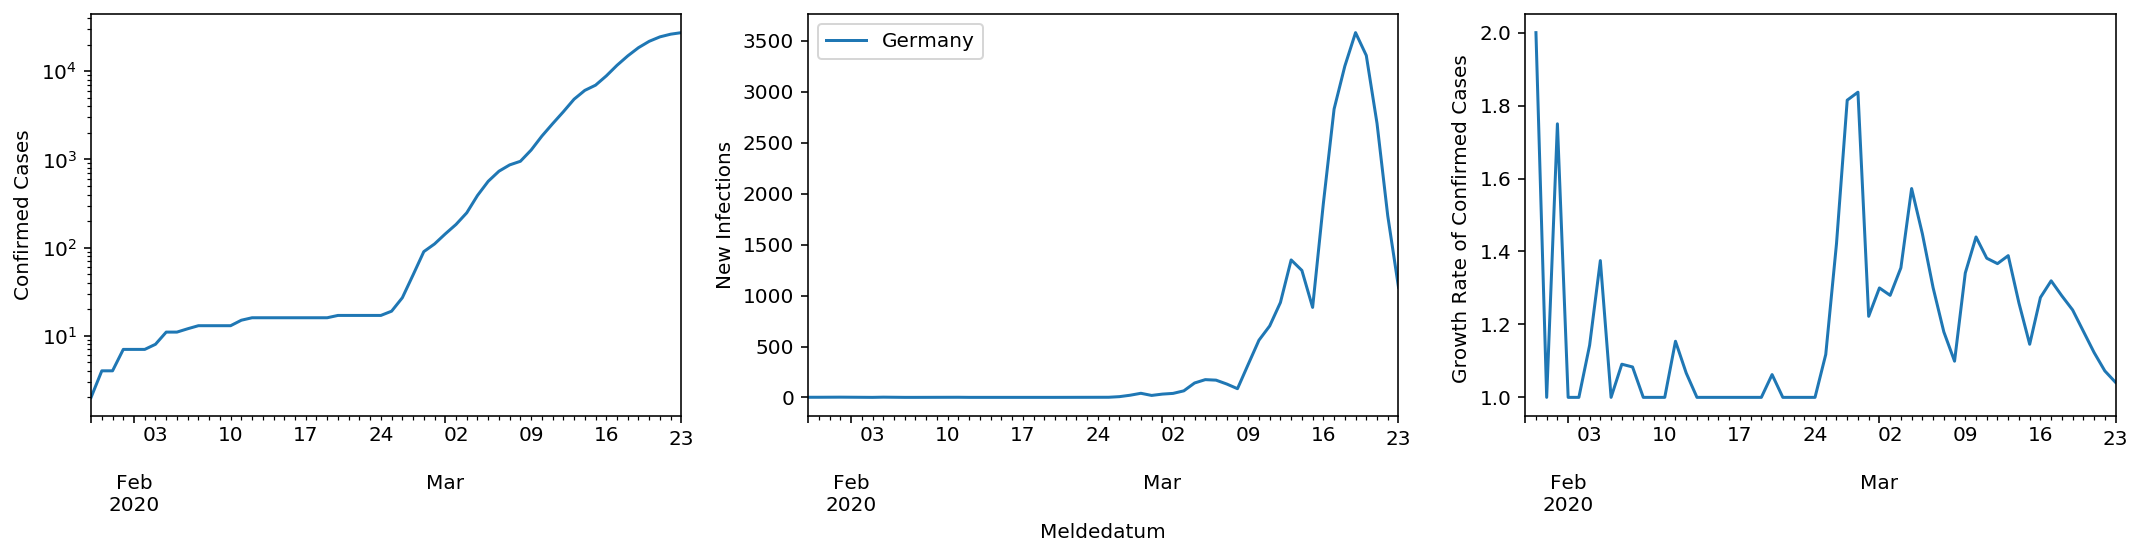

In [7]:
plt.close(1)
fig1, ax1 = plt.subplots(ncols=3, figsize=(15,4), sharex=True, num=1)

germany  = cases.sum(axis=1)
germanyc = casesc.sum(axis=1)

germanyc.plot(ax=ax1[0], logy=True)
germany.plot(ax=ax1[1])
(germanyc / germanyc.shift(1)).plot(ax=ax1[2])

ax1[0].set_ylabel('Confirmed Cases')
ax1[1].set_ylabel('New Infections')
ax1[2].set_ylabel('Growth Rate of Confirmed Cases ')

ax1[1].legend(['Germany'])
fig1.tight_layout()

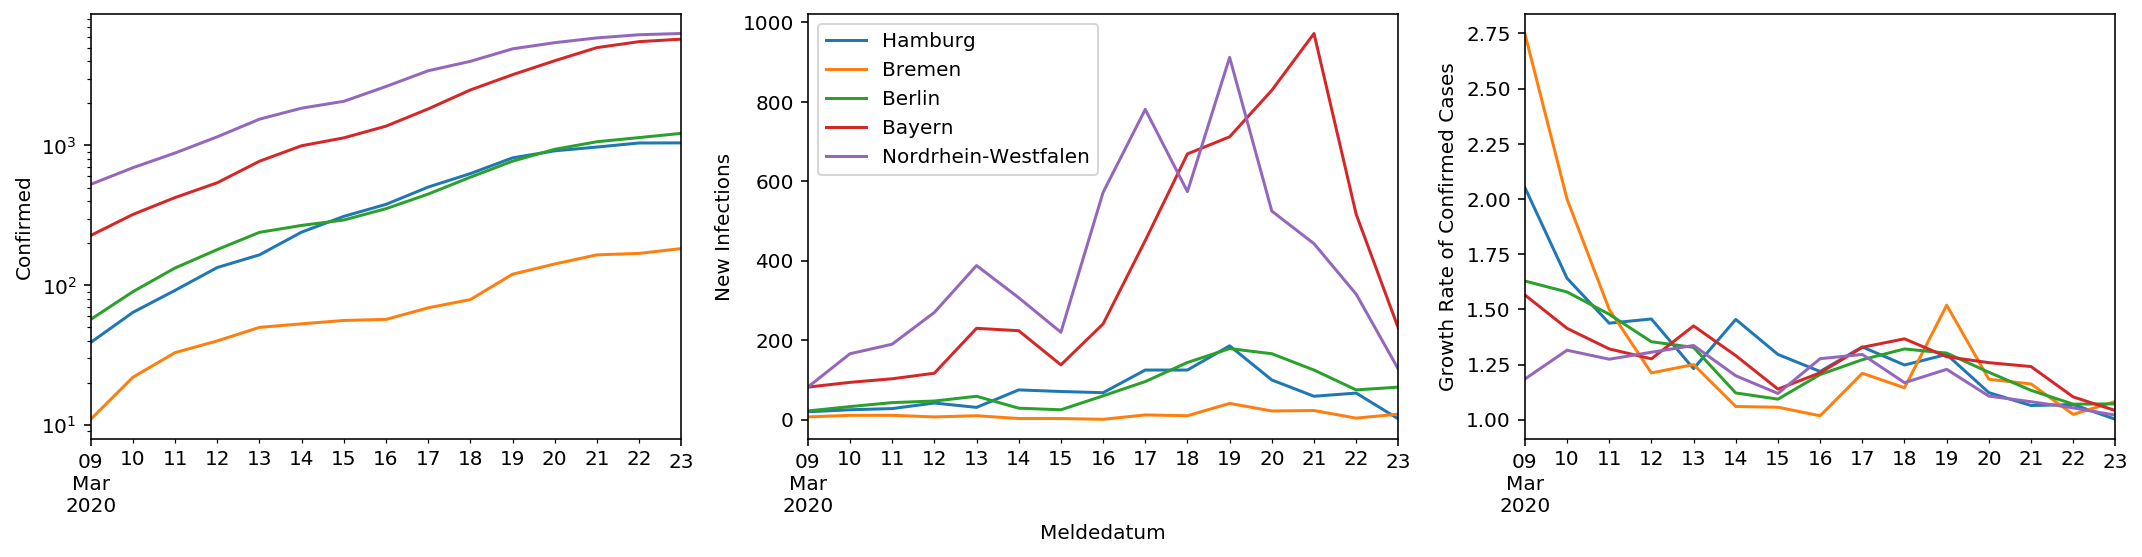

In [8]:
plt.close(2)
fig2, ax2 = plt.subplots(ncols=3, figsize=(15,4), sharex=True, num=2)

# show only last 2 weeks for better visibility
start = cases.index[-1].date() - pd.Timedelta('14d')
end   = cases.index[-1].date()

casesc.loc[start:end, plot_de].plot(ax=ax2[0], logy=True, legend=False)
cases.loc[start:end, plot_de].plot(ax=ax2[1], legend=False)
(casesc / casesc.shift(1)).loc[start:end, plot_de].plot(ax=ax2[2], legend=False)

ax2[0].set_ylabel('Confirmed')
ax2[1].set_ylabel('New Infections')
ax2[2].set_ylabel('Growth Rate of Confirmed Cases')

ax2[1].legend()

fig2.tight_layout()

In [9]:
# save the above figure
#fig2.savefig('covid-19_timeseries_de.png')